In [1]:
from utils import FishEyeImage, rot
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from scipy.optimize import minimize, curve_fit
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, angular_separation, position_angle, offset_by, ICRS
from PIL import Image
from photutils.aperture import CircularAperture
from scipy.optimize import minimize, curve_fit, differential_evolution

from astropy.table import Table, vstack

In [2]:
file = '004_0333'

zhangbei = EarthLocation(lon=115*u.deg+14*u.arcsec,lat=41*u.deg+13*u.arcmin+53*u.arcsec,height = 1466)
dunhuang  = EarthLocation(lon=94.322799*u.deg,lat=40.359581*u.deg,height = 1100)
lenghu = EarthLocation(lon=93.9018774741078*u.deg,lat=38.59868881470391*u.deg,height = 3500)
pic = FishEyeImage(file+'.CR3',loc = lenghu,mag_limit=6.5)

solution = pic.solve(solve_size=800)

{'ra': 4.009641944901821, 'dec': 0.6912212059994189, 'eq_roll': 4.301659036432567}


In [3]:
pic.plat_para

{'lon': 0.8852647406118989,
 'lat': 1.5452605091229925,
 'roll': 8.3468635202106,
 'cu': 3000.0,
 'cv': 2000.0}

Using existing star detection data
(-0.008654958064699103, 0.021890092203794217, -0.014107251917366273, 0.0022575296571061563)


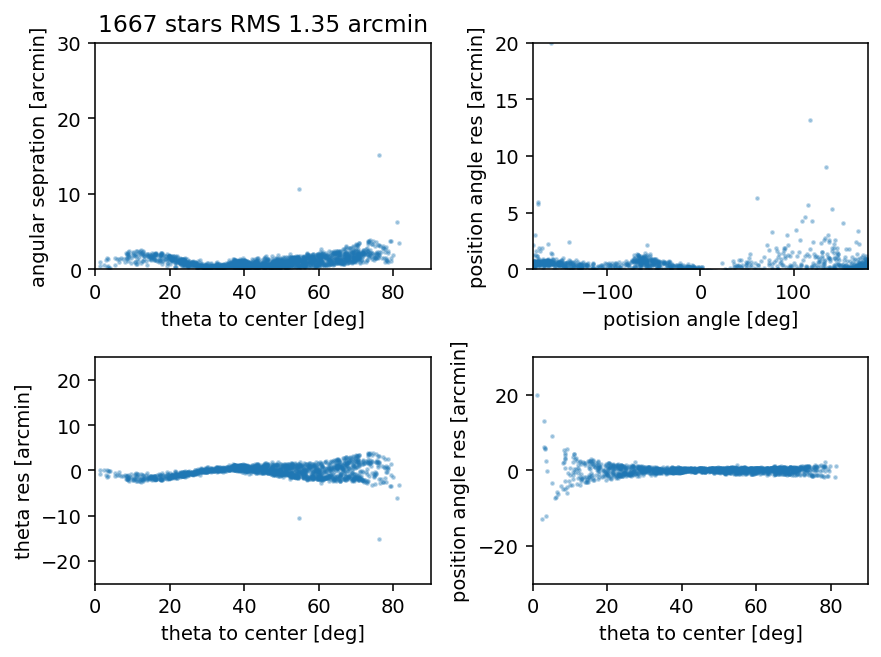

Using existing star detection data


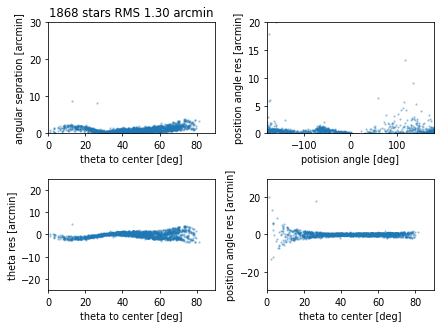

{'lon': 0.9279444586850232, 'lat': 1.5554382110906013, 'roll': 8.389547641461393, 'cu': 2976.5836442109353, 'cv': 2010.159090592712}
{'f': 14.606825237237603, 'k': -0.1709379425611742, 'ks': [-0.008654958064699103, 0.021890092203794217, -0.014107251917366273, 0.0022575296571061563]}


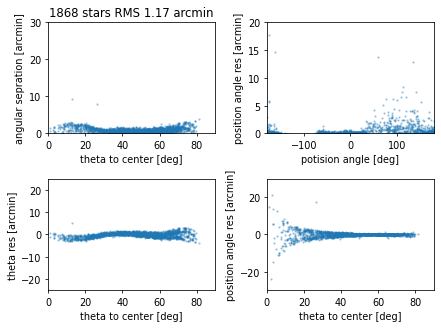

In [4]:
rms1 = pic.xmatch()
pic.outlier_cliping(clip_data='a_sep', theta_range=(0,90), bin_n=10, sigma=2)
result1  = pic.optimize()
pic.outlier_cliping(clip_data='a_sep', theta_range=(0,70), bin_n=10, sigma=1.5)
pic.outlier_cliping(clip_data='pa', theta_range=(40,90), bin_n=6, sigma=1.5)
result2  = pic.distort_optimize()
print(result2)
pic.draw_residual(alpha=0.3,dpi=70,s=2)

rms2 = pic.xmatch()
pic.outlier_cliping(clip_data='a_sep', theta_range=(0,85), bin_n=7, sigma=1.5)
pic.outlier_cliping(clip_data='a_sep', theta_range=(0,90), bin_n=15, sigma=1.5)
pic.draw_residual(alpha=0.3,dpi=70,s=2)
result  = pic.optimize(minmize_func=differential_evolution)
print(pic.plat_para)
print(pic.lens_para)
pic.draw_residual(alpha=0.3,dpi=70,s=2)